# Coba 1

In [ ]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 65.6 MB/s eta 0:00:00


In [ ]:
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot
from math import sqrt

import warnings
warnings.filterwarnings("ignore")


In [ ]:
df = read_csv('BBRI.JK.csv', header=0, index_col=0, parse_dates=True)
series = df['Close']
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-05,4750.0,4760.0,4570.0,4640.0,4582.378906,292142000
2023-01-06,4550.0,4640.0,4550.0,4620.0,4562.627441,175932000
2023-01-09,4580.0,4640.0,4550.0,4590.0,4533.000000,166164900
2023-01-10,4550.0,4570.0,4410.0,4430.0,4430.000000,282510000
2023-01-11,4410.0,4430.0,4360.0,4380.0,4380.000000,211610100


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2494 entries, 2013-01-02 to 2023-01-11
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2494 non-null   float64
 1   High       2494 non-null   float64
 2   Low        2494 non-null   float64
 3   Close      2494 non-null   float64
 4   Adj Close  2494 non-null   float64
 5   Volume     2494 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 136.4 KB


In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2494.000000,2494.000000,2494.000000,2494.000000,2494.000000,2.494000e+03
mean,3081.280283,3114.662398,3044.806020,3079.134405,2711.655501,1.420169e+08
std,1009.810910,1016.282387,997.968523,1006.913971,1070.886172,9.038373e+07
min,1270.000000,1310.000000,1240.000000,1270.000000,972.820251,0.000000e+00
25%,2200.000000,2225.000000,2180.000000,2200.000000,1757.721741,8.654002e+07
50%,3027.500000,3060.000000,2990.000000,3030.000000,2604.870850,1.209706e+08
75%,4087.500000,4130.000000,4040.000000,4080.000000,3742.108704,1.743450e+08
max,5000.000000,5025.000000,4920.000000,4980.000000,4918.156738,8.726073e+08


<Axes: xlabel='Date'>

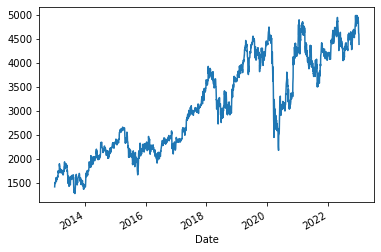

In [ ]:
series.plot()

<Axes: xlabel='Date'>

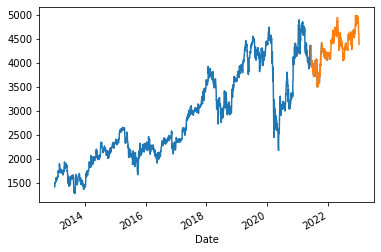

In [ ]:
train, test = series[:2246], series[2100:]
n = len(series)
n_train = len(train)
n_test = len(test)

fig, ax = pyplot.subplots()
train.plot(ax=ax)
test.plot(ax=ax)

In [ ]:
import pmdarima as pm

def arimamodel(timeseries):
  automodel = pm.auto_arima(timeseries,
                             start_p=0,
                             start_q=2,
                            test="adf",
                            seasonal=False,
                            trace = True,
                            stepwise=False)
  return automodel

In [ ]:
automodel = arimamodel(train)
print(automodel.summary())

 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=24894.921, Time=0.14 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=24894.520, Time=0.24 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=24878.902, Time=1.43 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=24877.048, Time=2.10 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=24876.743, Time=1.57 sec
 ARIMA(0,1,5)(0,0,0)[0] intercept   : AIC=24878.453, Time=1.81 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=24894.917, Time=0.14 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=24881.879, Time=1.63 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=24876.136, Time=2.20 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=24877.951, Time=2.00 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=24878.607, Time=4.55 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=24881.610, Time=0.27 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=24875.834, Time=1.55 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=24875.002, Time=4.04 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=24876.654, Time=6.76

In [ ]:
test.shape[0]

394

In [ ]:
predictions_arima = automodel.predict(n_periods=test.shape[0])
predictions_arima

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


2246    4172.721356
2247    4178.135520
2248    4179.577644
2249    4177.903987
2250    4182.613521
           ...     
2635    4656.045733
2636    4657.279649
2637    4658.513565
2638    4659.747481
2639    4660.981397
Length: 394, dtype: float64

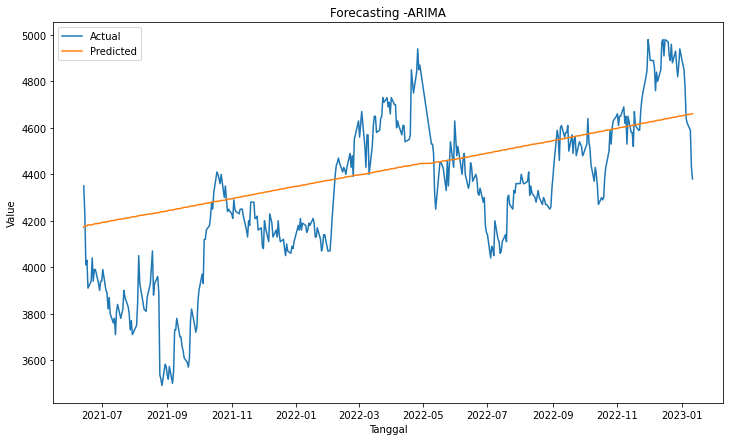

In [ ]:
pyplot.figure(figsize=(12,7))
pyplot.plot(test.index, test, label='Actual')
pyplot.plot(test.index, predictions_arima, label='Predicted')
pyplot.title('Forecasting -ARIMA')
pyplot.xlabel('Tanggal')
pyplot.ylabel('Value')
pyplot.legend()

In [ ]:
rmse = sqrt(mean_squared_error(test, predictions_arima))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 267.744


<Axes: >

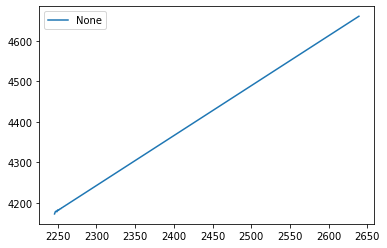

In [ ]:
#Visualization
predictions_arima.plot(legend = True)
#pyplot.plot(test.index, predictions_arima, label='Predicted')

In [ ]:
predictions_arima.describe()

count     394.000000
mean     4418.511059
std       140.531442
min      4172.721356
25%      4297.284651
50%      4418.516900
75%      4539.749148
max      4660.981397
dtype: float64

# COba 2

In [ ]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 23.9 MB/s eta 0:00:00


In [ ]:
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot
from math import sqrt

import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = read_csv('BBRI.JK.csv', header=0, index_col=0, parse_dates=True)
series = df['Close']
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-05,4750.0,4760.0,4570.0,4640.0,4582.378906,292142000
2023-01-06,4550.0,4640.0,4550.0,4620.0,4562.627441,175932000
2023-01-09,4580.0,4640.0,4550.0,4590.0,4533.000000,166164900
2023-01-10,4550.0,4570.0,4410.0,4430.0,4430.000000,282510000
2023-01-11,4410.0,4430.0,4360.0,4380.0,4380.000000,211610100


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2494 entries, 2013-01-02 to 2023-01-11
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2494 non-null   float64
 1   High       2494 non-null   float64
 2   Low        2494 non-null   float64
 3   Close      2494 non-null   float64
 4   Adj Close  2494 non-null   float64
 5   Volume     2494 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 136.4 KB


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
#Deklarasi fungsi untuk mengecek stasioneritas data
# Deklarasi fungsi untuk mengecek stasioner data
from statsmodels.tsa.stattools import adfuller
def test_stasionarity(timeseries):
  # Determinate rolling statis
  rolmen = timeseries.rolling(window =12).mean()
  rolstd = timeseries.rolling(window=12).std()

  # Plot rolling statistic :
  orig = plt.plot(timeseries, color='blue', label = 'Original')
  mean = plt.plot(rolmen, color='red', label = 'Rolling Mean')
  std = plt.plot(rolstd, color='black', label= 'Rolling Std')
  plt.legend(loc='best')
  plt.title('Rolling Mean & Standard Deviation')
  plt.show()

  #Perform Dickey-Fuller test
  print('Result of Dickey-Fuller Test: ')
  dftest = adfuller(timeseries, autolag='AIC')
  dfoutput = pd.Series(dftest[0:4], index = ['Test Statuctic', 'p-value','#Lags Used', 'Number of Observations Used'])
  for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key]=value
  print(dfoutput)

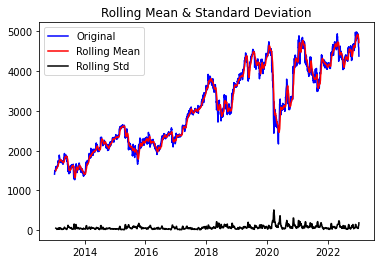

Result of Dickey-Fuller Test: 
Test Statuctic                   -1.668388
p-value                           0.447469
#Lags Used                        3.000000
Number of Observations Used    2490.000000
Critical Value (1%)              -3.432979
Critical Value (5%)              -2.862701
Critical Value (10%)             -2.567388
dtype: float64


In [ ]:
#Melakukan uji stasioneritas untuk dataset
test_stasionarity(series)

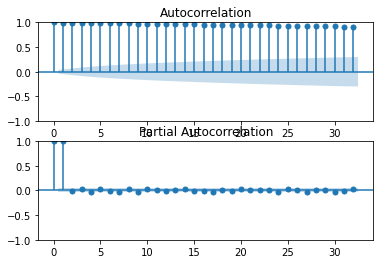

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
plt.figure()
plt. subplot (211)
plot_acf(series, ax=plt.gca(), lags=32)
plt.subplot(212)
plot_pacf(series, ax=plt.gca(), lags=32)
plt.show()

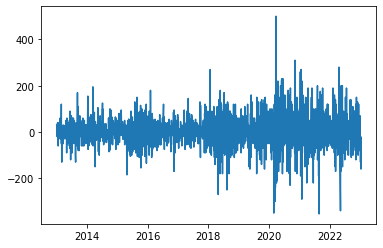

In [ ]:
series_diff_1 = series - series.shift()
series_diff_1 = series_diff_1.dropna()
plt.plot(series_diff_1)

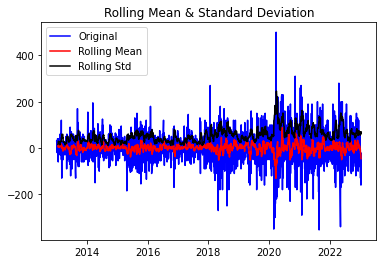

Result of Dickey-Fuller Test: 
Test Statuctic                  -28.857943
p-value                           0.000000
#Lags Used                        2.000000
Number of Observations Used    2490.000000
Critical Value (1%)              -3.432979
Critical Value (5%)              -2.862701
Critical Value (10%)             -2.567388
dtype: float64


In [ ]:
test_stasionarity(series_diff_1)

<Axes: xlabel='Date'>

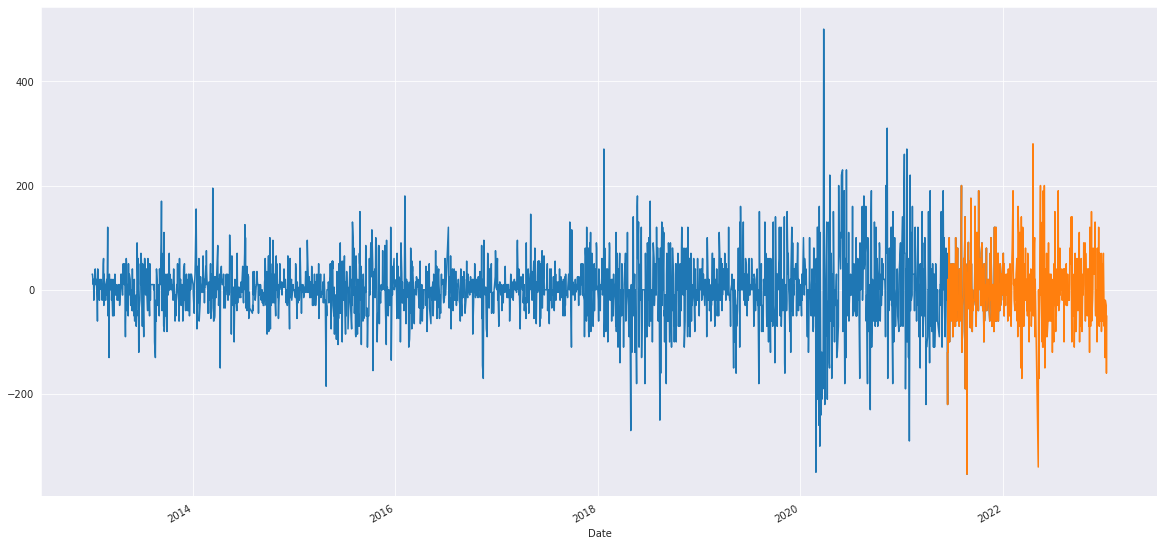

In [ ]:
train, test = series_diff_1[:2246], series_diff_1[2100:]
n = len(series_diff_1)
n_train = len(train)
n_test = len(test)

fig, ax = pyplot.subplots()
train.plot(ax=ax)
test.plot(ax=ax)

In [ ]:
import pmdarima as pm

def arimamodel(timeseries):
  automodel = pm.auto_arima(timeseries,
                             start_p=0,
                             start_q=2,
                            test="adf",
                            seasonal=False,
                            trace = True,
                            stepwise=False)
  return automodel

In [ ]:
automodel = arimamodel(train)
print(automodel.summary())

 ARIMA(0,0,0)(0,0,0)[0]             : AIC=24904.137, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=24903.668, Time=0.13 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=24888.158, Time=0.17 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=24886.181, Time=0.52 sec
 ARIMA(0,0,4)(0,0,0)[0]             : AIC=24885.916, Time=0.70 sec
 ARIMA(0,0,5)(0,0,0)[0]             : AIC=24887.648, Time=0.73 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=24904.078, Time=0.06 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=24890.941, Time=0.42 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=24885.298, Time=0.41 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=24887.068, Time=0.78 sec
 ARIMA(1,0,4)(0,0,0)[0]             : AIC=24887.790, Time=1.60 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=24890.868, Time=0.23 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=24884.945, Time=0.70 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=24884.077, Time=1.75 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=24885.738, Time=1.95

In [ ]:
test.shape[0]

393

In [ ]:
model_ARIMA = auto_arima(series, order=(2,0,2))
forecast = model_ARIMA.predict(n_periods=150)
print(forecast)

2494    4387.379959
2495    4384.107081
2496    4385.240028
2497    4386.105244
2498    4384.091906
           ...     
2639    4385.250084
2640    4385.250084
2641    4385.250084
2642    4385.250084
2643    4385.250084
Length: 150, dtype: float64


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


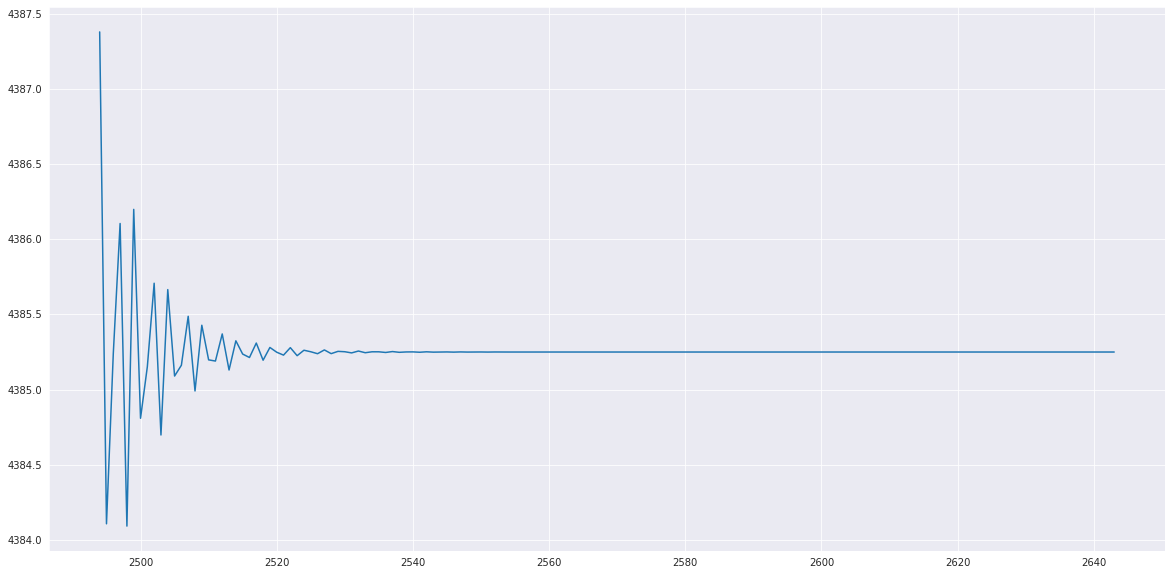

In [ ]:
plt.plot(forecast)

In [ ]:
predictions_arima = automodel.predict(n_periods=test.shape[0])
predictions_arima

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


2246    3.163165e+00
2247    1.752524e+00
2248   -4.180808e+00
2249    4.079136e+00
2250   -2.413574e+00
            ...     
2634    3.158917e-38
2635   -2.171284e-38
2636    6.929460e-39
2637    5.161969e-39
2638   -1.080087e-38
Length: 393, dtype: float64

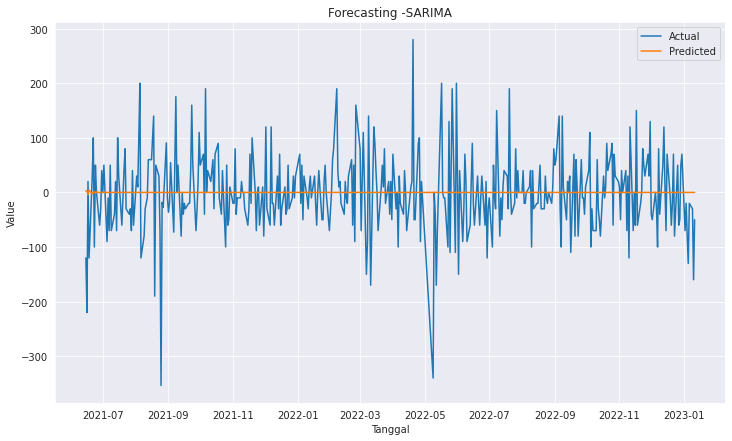

In [ ]:
pyplot.figure(figsize=(12,7))
pyplot.plot(test.index, test, label='Actual')
pyplot.plot(test.index, predictions_arima, label='Predicted')
pyplot.title('Forecasting -SARIMA')
pyplot.xlabel('Tanggal')
pyplot.ylabel('Value')
pyplot.legend()

In [ ]:
rmse = sqrt(mean_squared_error(test, predictions_arima))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 73.405


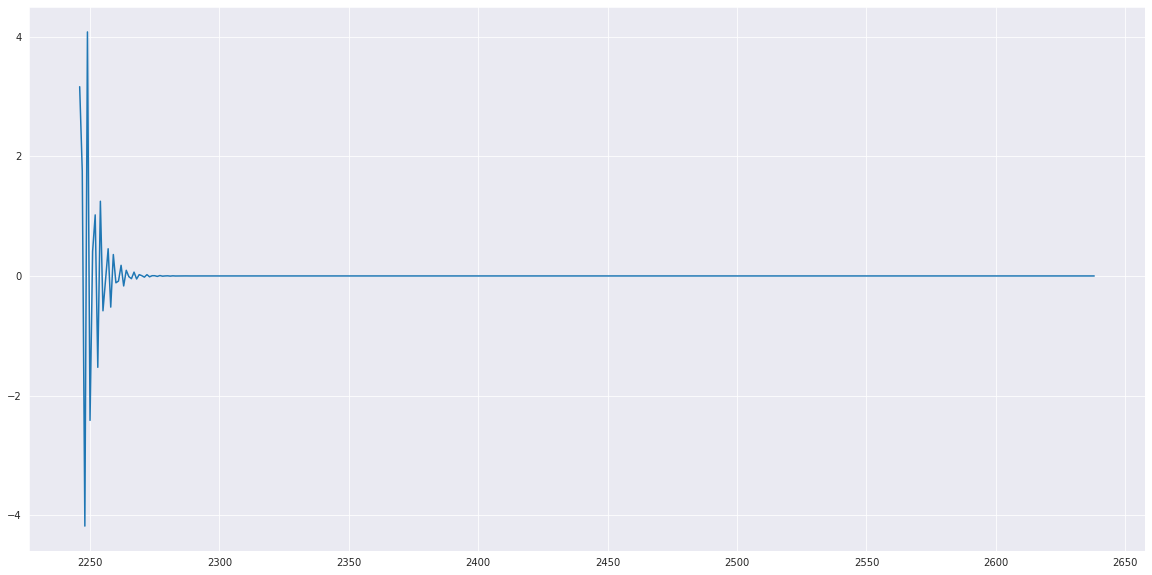

In [ ]:
#predictions_arima.plot(legend = True)
plt.rcParams['figure.figsize'] = 20, 10
plt.plot(predictions_arima)

# Coba 3

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 15, 6
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
# from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima.model import ARIMA
import warnings
from sklearn.metrics import mean_squared_error
from math import sqrt

In [ ]:
data = pd.read_csv("BBRI.JK.csv")

In [ ]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,1/2/2013,1410.0,1420.0,1400.0,1410.0,1054.786377,63785000
1,1/3/2013,1440.0,1440.0,1410.0,1440.0,1077.228882,131805000
2,1/4/2013,1470.0,1480.0,1440.0,1470.0,1099.670898,302125000
3,1/7/2013,1480.0,1500.0,1470.0,1480.0,1107.151733,275697500
4,1/8/2013,1500.0,1500.0,1480.0,1500.0,1122.113037,234447500
...,...,...,...,...,...,...,...
2489,1/5/2023,4750.0,4760.0,4570.0,4640.0,4582.378906,292142000
2490,1/6/2023,4550.0,4640.0,4550.0,4620.0,4562.627441,175932000
2491,1/9/2023,4580.0,4640.0,4550.0,4590.0,4533.000000,166164900
2492,1/10/2023,4550.0,4570.0,4410.0,4430.0,4430.000000,282510000


In [ ]:
type(data)

pandas.core.frame.DataFrame

In [ ]:
data.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of        Date   Open   High    Low  Close  Adj Close  Volume
0     False  False  False  False  False      False   False
1     False  False  False  False  False      False   False
2     False  False  False  False  False      False   False
3     False  False  False  False  False      False   False
4     False  False  False  False  False      False   False
...     ...    ...    ...    ...    ...        ...     ...
2489  False  False  False  False  False      False   False
2490  False  False  False  False  False      False   False
2491  False  False  False  False  False      False   False
2492  False  False  False  False  False      False   False
2493  False  False  False  False  False      False   False

[2494 rows x 7 columns]>

In [ ]:
data.isnull().sum()/len(data)

Date         0.0
Open         0.0
High         0.0
Low          0.0
Close        0.0
Adj Close    0.0
Volume       0.0
dtype: float64

In [ ]:
data = data.drop(["Open","Low", "High", "Adj Close", "Volume"],axis="columns")

In [ ]:
data.isnull().sum()/len(data)

Date     0.0
Close    0.0
dtype: float64

In [ ]:
#Mengubah tanggal menjadi index
con = data[ 'Date']
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
#check datatype of index
data.index

DatetimeIndex(['2013-01-02', '2013-01-03', '2013-01-04', '2013-01-07',
               '2013-01-08', '2013-01-09', '2013-01-10', '2013-01-11',
               '2013-01-14', '2013-01-15',
               ...
               '2022-12-29', '2022-12-30', '2023-01-02', '2023-01-03',
               '2023-01-04', '2023-01-05', '2023-01-06', '2023-01-09',
               '2023-01-10', '2023-01-11'],
              dtype='datetime64[ns]', name='Date', length=2494, freq=None)

In [ ]:
ts= data['Close']
ts.head(10)

Date
2013-01-02    1410.0
2013-01-03    1440.0
2013-01-04    1470.0
2013-01-07    1480.0
2013-01-08    1500.0
2013-01-09    1480.0
2013-01-10    1480.0
2013-01-11    1490.0
2013-01-14    1530.0
2013-01-15    1560.0
Name: Close, dtype: float64

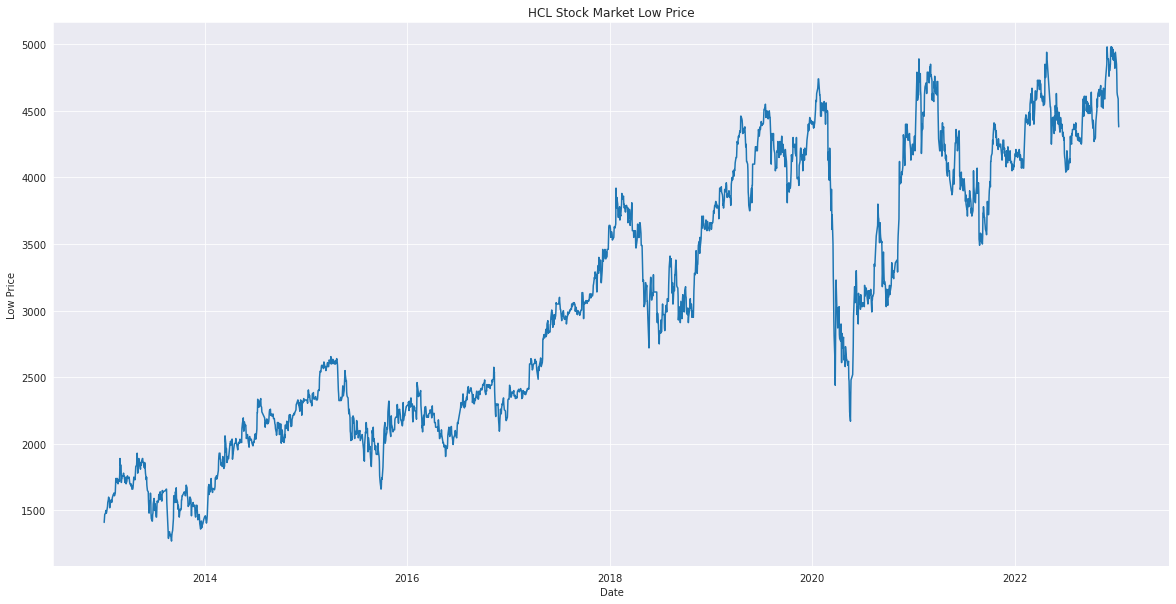

In [ ]:
#Visualisasi dataset
plt.figure(figsize=(20,10))
sns.set_style('darkgrid')
plt.xlabel('Date')
plt.ylabel('Low Price')
plt.title('HCL Stock Market Low Price')
plt.plot(data['Close'])

In [ ]:
#Deklarasi fungsi untuk mengecek stasioneritas data
# Deklarasi fungsi untuk mengecek stasioner data
from statsmodels.tsa.stattools import adfuller
def test_stasionarity(timeseries):
  # Determinate rolling statis
  rolmen = timeseries.rolling(window =12).mean()
  rolstd = timeseries.rolling(window=12).std()

  # Plot rolling statistic :
  orig = plt.plot(timeseries, color='blue', label = 'Original')
  mean = plt.plot(rolmen, color='red', label = 'Rolling Mean')
  std = plt.plot(rolstd, color='black', label= 'Rolling Std')
  plt.legend(loc='best')
  plt.title('Rolling Mean & Standard Deviation')
  plt.show()

  #Perform Dickey-Fuller test
  print('Result of Dickey-Fuller Test: ')
  dftest = adfuller(timeseries, autolag='AIC')
  dfoutput = pd.Series(dftest[0:4], index = ['Test Statuctic', 'p-value','#Lags Used', 'Number of Observations Used'])
  for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key]=value
  print(dfoutput)

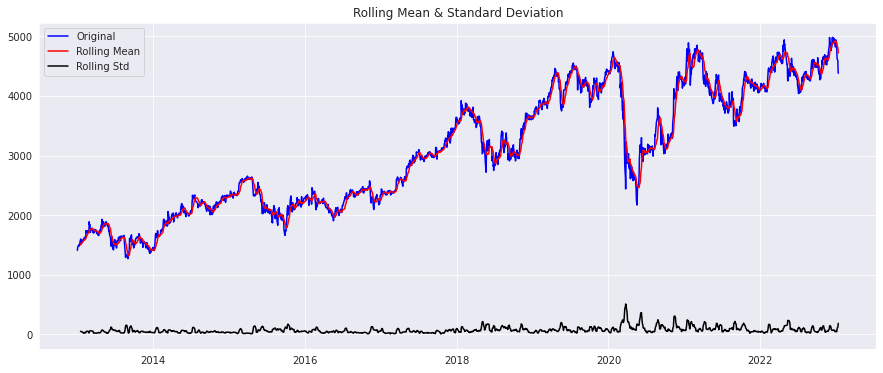

Result of Dickey-Fuller Test: 
Test Statuctic                   -1.668388
p-value                           0.447469
#Lags Used                        3.000000
Number of Observations Used    2490.000000
Critical Value (1%)              -3.432979
Critical Value (5%)              -2.862701
Critical Value (10%)             -2.567388
dtype: float64


In [ ]:
test_stasionarity(ts)

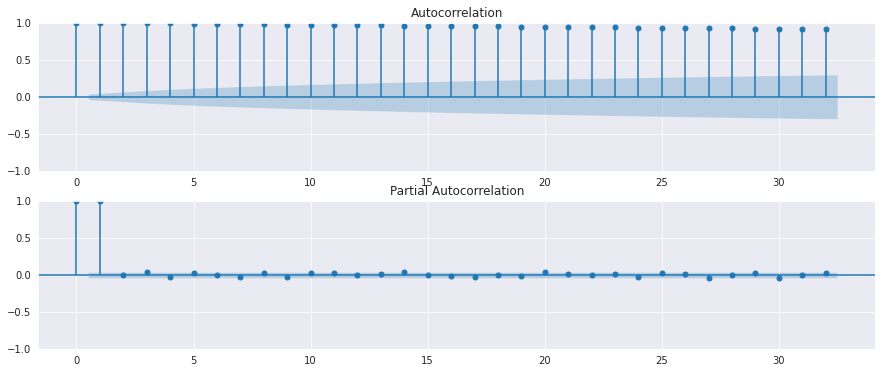

In [ ]:
plt.figure()
plt. subplot (211)
plot_acf(ts, ax=plt.gca(), lags=32)
plt.subplot(212)
plot_pacf(ts, ax=plt.gca(), lags=32)
plt.show()

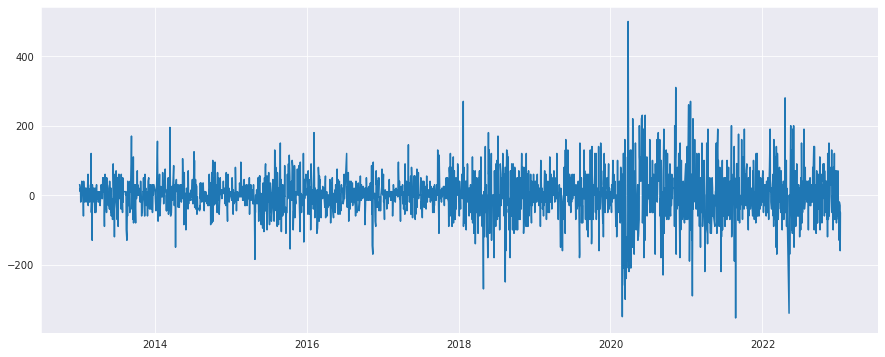

In [ ]:
ts_diff_1 = ts - ts.shift()
ts_diff_1 = ts_diff_1.dropna()
plt.plot(ts_diff_1)

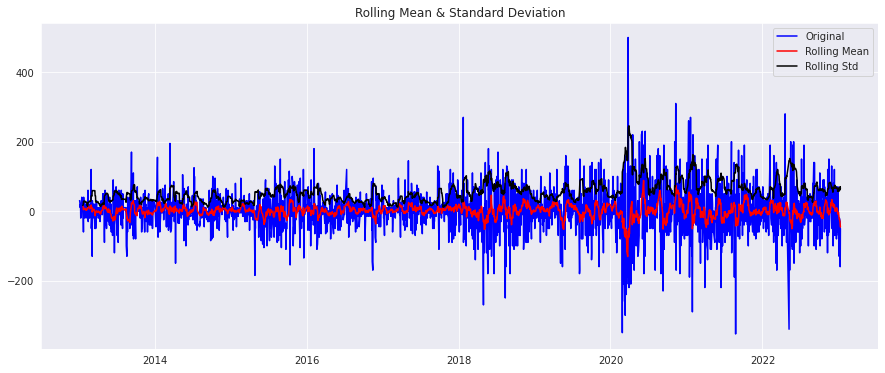

Result of Dickey-Fuller Test: 
Test Statuctic                  -28.857943
p-value                           0.000000
#Lags Used                        2.000000
Number of Observations Used    2490.000000
Critical Value (1%)              -3.432979
Critical Value (5%)              -2.862701
Critical Value (10%)             -2.567388
dtype: float64


In [ ]:
test_stasionarity(ts_diff_1)

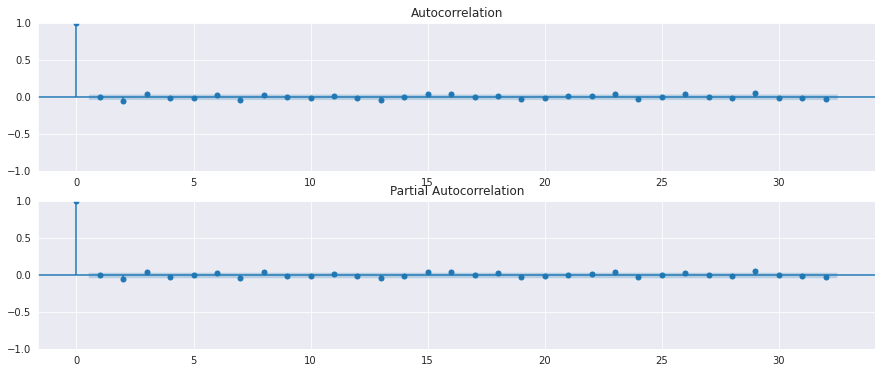

In [ ]:
plt.figure()
plt. subplot (211)
plot_acf(ts_diff_1, ax=plt.gca(), lags=32)
plt.subplot(212)
plot_pacf(ts_diff_1, ax=plt.gca(), lags=32)
plt.show()

In [ ]:
test_size = int(len(ts)*0.9)

In [ ]:
train,test = data.iloc[:-test_size], data.iloc[-test_size:]
x_train,x_test = np.array(range(train.shape[0])), np.array(range(train.shape[0]))
train.shape, x_train.shape, test.shape, x_test.shape

((250, 1), (250,), (2244, 1), (250,))

In [ ]:
from pmdarima.arima import auto_arima

model = pm.auto_arima(train,
                             start_p=0,
                             start_q=2,
                            test="adf",
                            seasonal=False,
                            trace = True,
                            stepwise=False)

 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2540.987, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2540.648, Time=0.18 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=2542.144, Time=0.19 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=2543.451, Time=0.27 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=2545.254, Time=0.33 sec
 ARIMA(0,1,5)(0,0,0)[0] intercept   : AIC=2546.163, Time=0.47 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2540.894, Time=0.09 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2542.373, Time=0.28 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=2543.622, Time=0.28 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=2546.077, Time=0.50 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=2546.164, Time=0.66 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=2541.933, Time=0.13 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=2543.464, Time=0.35 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=2545.406, Time=0.41 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.90 sec
 ARIMA(3,1,0)(0

In [ ]:
model_ARIMA = auto_arima(ts, order=(0,1,1))
forecast = model_ARIMA.predict(n_periods=150)
print(forecast)

2494    4387.379959
2495    4384.107081
2496    4385.240028
2497    4386.105244
2498    4384.091906
           ...     
2639    4385.250084
2640    4385.250084
2641    4385.250084
2642    4385.250084
2643    4385.250084
Length: 150, dtype: float64


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


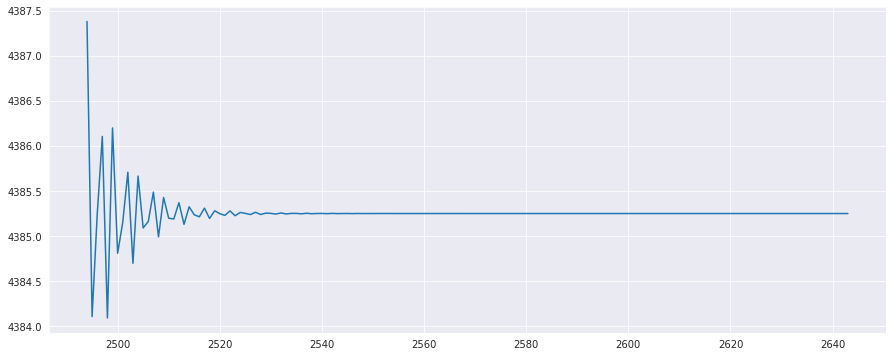

In [ ]:
plt.plot(forecast)

In [ ]:
from math import sqrt
rmse = sqrt(mean_squared_error(test, forecast))
print('Test RMSE: %.3f' % rmse)

ValueError: ignored